In [34]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans

In [35]:
#load data_1
data = pd.read_csv('data_1.csv')

In [36]:
data

,customer_unique_id,frequency,recency,amount_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,1,612,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,609,18.90
2,0000f46a3911fa3c0805444483337064,1,186,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,402,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,435,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,276,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,1,461,64.89
96093,ffff371b4d645b6ecea244b27531430a,1,155,89.90
96094,ffff5962728ec6157033ef9805bacc48,1,604,115.00


In [37]:
data.set_index('customer_unique_id', inplace=True)

In [39]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 5)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(data)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

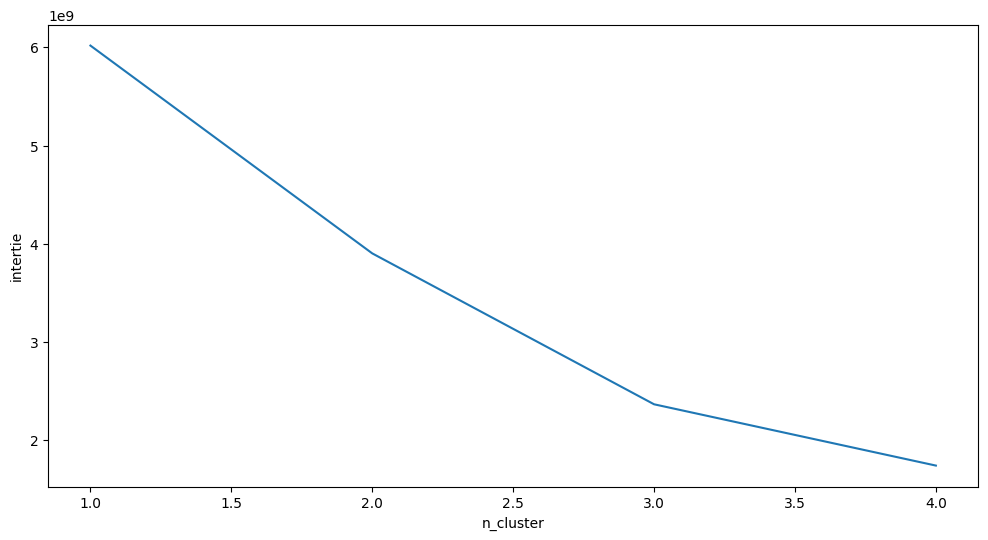

In [40]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [42]:
data_cluster = pd.DataFrame(data={'cluster': kmeans.labels_}, index=data.index)
data = data.merge(data_cluster, left_index=True, right_index=True)

In [43]:
data

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,612,129.90,2
0000b849f77a49e4a4ce2b2a4ca5be3f,1,609,18.90,2
0000f46a3911fa3c0805444483337064,1,186,69.00,1
0000f6ccb0745a6a4b88665a16c9f078,1,402,25.99,1
0004aac84e0df4da2b147fca70cf8255,1,435,180.00,1
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,276,1570.00,0
fffea47cd6d3cc0a88bd621562a9d061,1,461,64.89,1
ffff371b4d645b6ecea244b27531430a,1,155,89.90,1


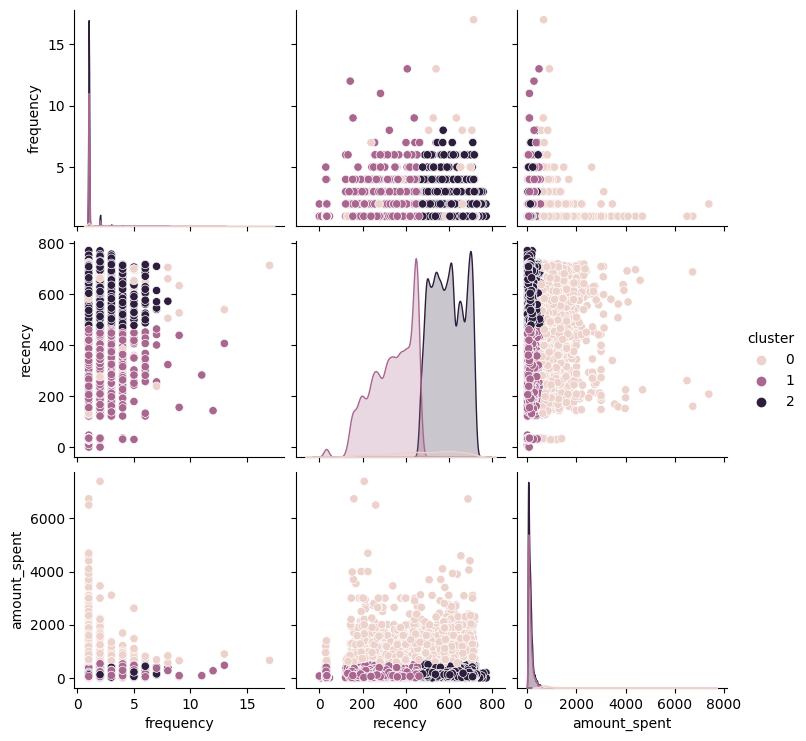

In [45]:
sns.pairplot(data, hue="cluster")

In [17]:
data.loc[data['amount_spent'] > 1000]

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
005226be8d5b972d0f72b4e8a79f322b,1,574,1561.00,2
00adeda9b742746c0c66e10d00ea1b74,2,428,2078.50,2
00c07da5ba0e07b4f248a3a373b07476,1,690,2258.00,2
011875f0176909c5cf0b14a9138bb691,1,194,3999.90,2
0129d48dce554d95f641d01eaa88904a,1,557,1390.00,2
...,...,...,...,...
ff0e4a6f3114ad1d211b885159bf1eb2,1,208,1654.44,2
ff4159b92c40ebe40454e3e6a7c35ed6,1,261,6499.00,2
ff6c9c45f6cee4ec0785650b18322d73,1,681,1499.00,2


In [46]:
data.sort_values(by='amount_spent', ascending=False)

,frequency,recency,amount_spent,cluster
customer_unique_id,,,,
da122df9eeddfedc1dc1f5349a1a690c,2,208,7388.0,0
dc4802a71eae9be1dd28f5d788ceb526,1,160,6735.0,0
459bef486812aa25204be022145caa62,1,688,6729.0,0
ff4159b92c40ebe40454e3e6a7c35ed6,1,261,6499.0,0
eebb5dda148d3893cdaf5b5ca3040ccb,1,225,4690.0,0
...,...,...,...,...
e9429d622d9e764ca60ba01bc252b0a8,1,389,0.0,1
79132474f452e159527245c7141ebabe,1,227,0.0,1
8886115442775dd8a20c2dcc921c7cc8,1,30,0.0,1


In [51]:
data_log_amount_spent = data.copy()
data_log_amount_spent['amount_spent'] =\
            np.log(data_log_amount_spent['amount_spent'])

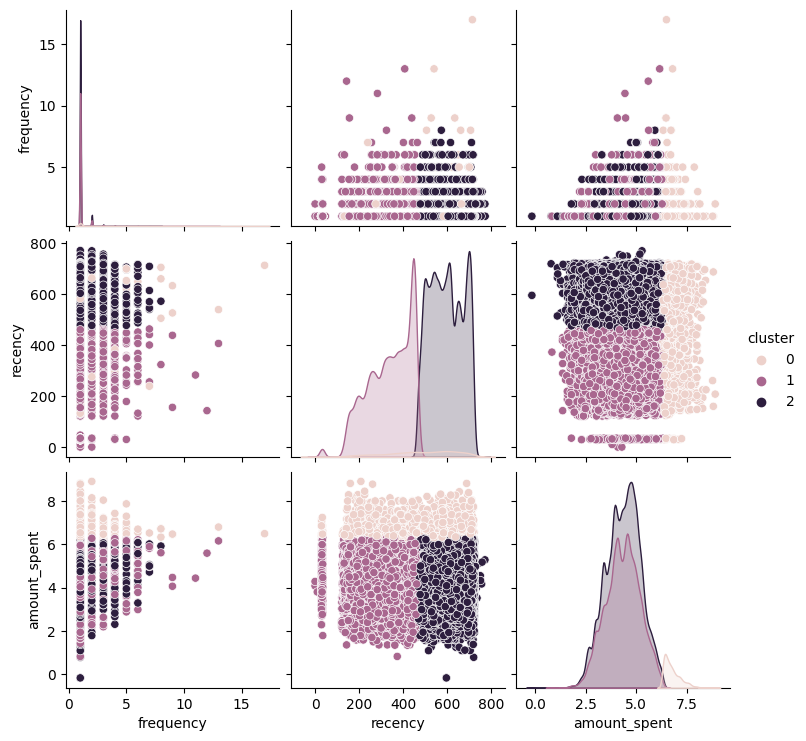

In [50]:
sns.pairplot(data_log_amount_spent, hue="cluster")

In [52]:
data_frequency = data.drop(data.loc[data['frequency']<2].index, axis=0)

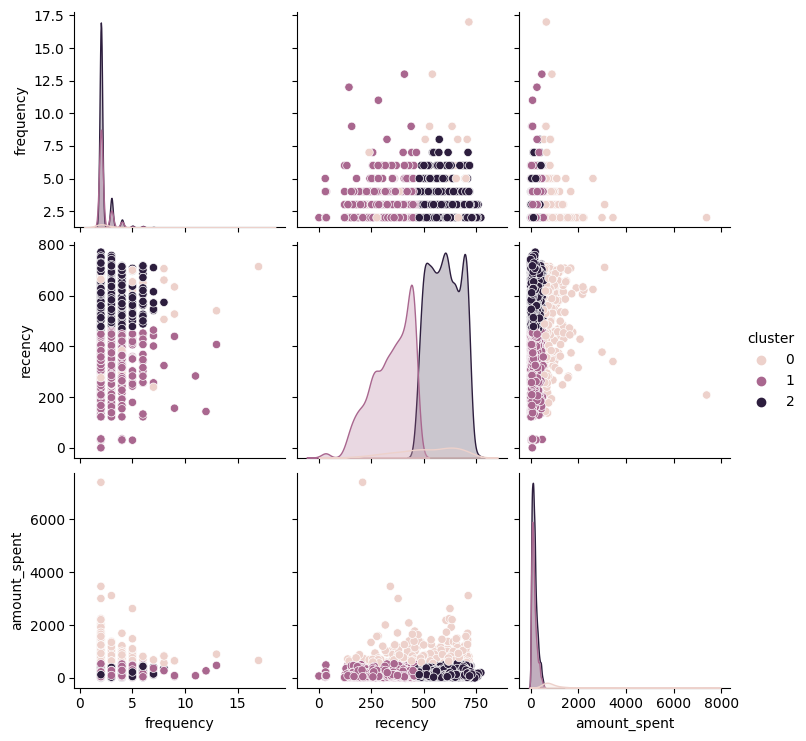

In [53]:
sns.pairplot(data_frequency, hue="cluster")

In [54]:
data_cluster_0 = data.loc[data['cluster']==0]
data_cluster_1 = data.loc[data['cluster']==1]
data_cluster_2 = data.loc[data['cluster']==2]

In [58]:
data.describe()

,frequency,recency,amount_spent,cluster
count,96096.000000,96096.000000,96096.000000,96096.000000
mean,1.080222,484.038118,131.306399,1.526359
std,0.368749,153.413173,197.726614,0.557017
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,375.000000,43.200000,1.000000
50%,1.000000,503.000000,79.990000,2.000000
75%,1.000000,608.000000,147.900000,2.000000
max,17.000000,772.000000,7388.000000,2.000000


In [55]:
data_cluster_0.describe()

,frequency,recency,amount_spent,cluster
count,2929.000000,2929.000000,2929.000000,2929.0
mean,1.157733,478.894503,967.891523,0.0
std,0.701561,154.712322,546.658101,0.0
min,1.000000,29.000000,534.900000,0.0
25%,1.000000,370.000000,634.400000,0.0
50%,1.000000,496.000000,790.000000,0.0
75%,1.000000,607.000000,1099.000000,0.0
max,17.000000,722.000000,7388.000000,0.0


In [57]:
data_cluster_1.describe()

,frequency,recency,amount_spent,cluster
count,39657.000000,39657.000000,39657.000000,39657.0
mean,1.077489,334.863479,103.338911,1.0
std,0.368086,96.515941,90.158230,0.0
min,1.000000,0.000000,0.000000,1.0
25%,1.000000,261.000000,39.990000,1.0
50%,1.000000,348.000000,76.000000,1.0
75%,1.000000,423.000000,134.900000,1.0
max,13.000000,465.000000,590.000000,1.0


In [56]:
data_cluster_2.describe()

,frequency,recency,amount_spent,cluster
count,53510.000000,53510.000000,53510.000000,53510.0
mean,1.078004,594.875051,106.240969,2.0
std,0.341338,72.625607,91.194907,0.0
min,1.000000,461.000000,0.000000,2.0
25%,1.000000,533.000000,42.510000,2.0
50%,1.000000,593.000000,79.900000,2.0
75%,1.000000,658.000000,139.900000,2.0
max,8.000000,772.000000,554.900000,2.0


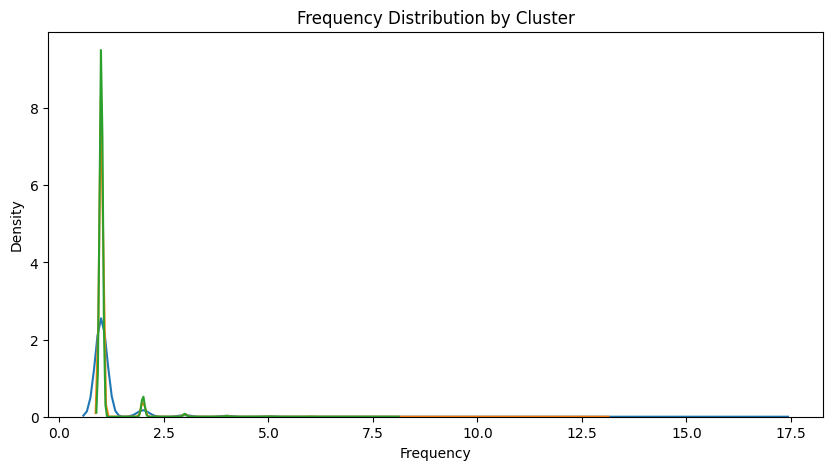

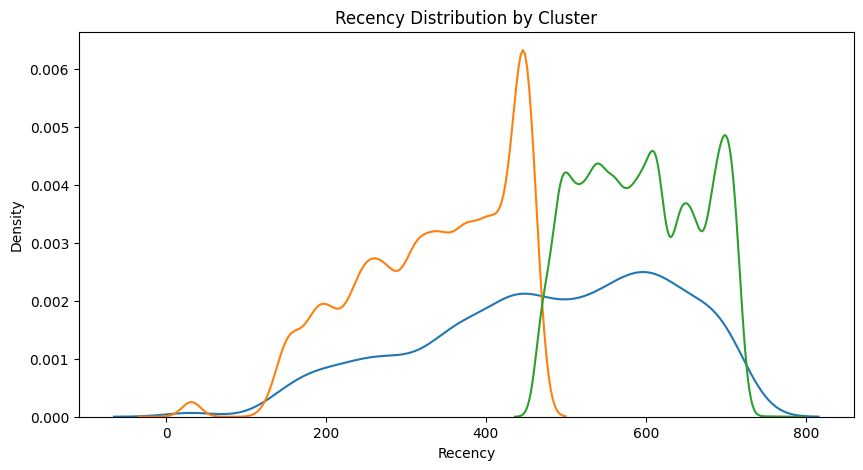

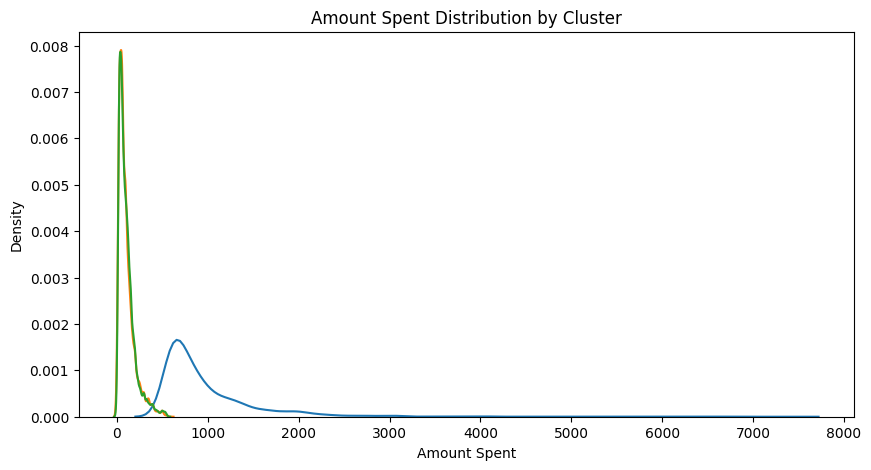

In [63]:
# Plot the distribution of frequency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['frequency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['frequency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['frequency'], label='Cluster 2', legend=True)
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.show()

# Plot the distribution of recency for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['recency'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['recency'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['recency'], label='Cluster 2', legend=True)
plt.title('Recency Distribution by Cluster')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

# Plot the distribution of amount spent for each cluster
plt.figure(figsize=(10,5))
sns.kdeplot(data_cluster_0['amount_spent'], label='Cluster 0', legend=True)
sns.kdeplot(data_cluster_1['amount_spent'], label='Cluster 1', legend=True)
sns.kdeplot(data_cluster_2['amount_spent'], label='Cluster 2', legend=True)
plt.title('Amount Spent Distribution by Cluster')
plt.xlabel('Amount Spent')
plt.ylabel('Density')
plt.show()